In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('..\\data\\AllTrainingData.csv', index_col='Unnamed: 0')
df.city = pd.get_dummies(df.city).astype('int64').sj
df = df.rename(columns = {'city':'isSJ'})
df.weekofyear.astype('int64')
df = df.drop('week_start_date',axis = 1)
df = df.dropna()
print(df.shape)
df.head()

(1199, 24)


,isSJ,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [97]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

In [82]:
featureNames = list(df.columns[:-1])
lables = df.columns[-1]
X = np.array(df[featureNames])
y = np.array(df[lables])

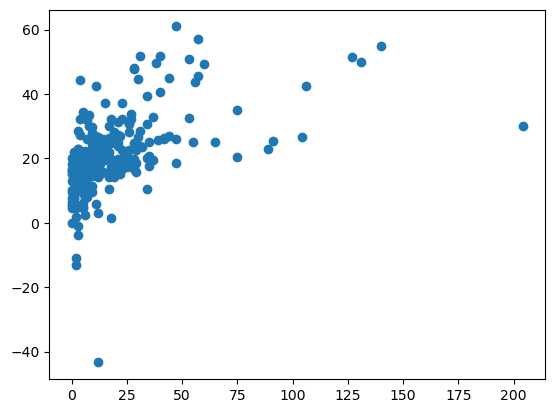

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .8, shuffle= True,random_state = 59)
pipe = Pipeline([('scale',StandardScaler()), ('polyFea', PolynomialFeatures(degree = 4)),('ridge',Lasso(alpha = 5))])
pipe.fit(X_train,y_train)
y_est = pipe.predict(X_test)
plt.scatter(y_test,y_est)

c:\Users\david\anaconda3\envs\dengai\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


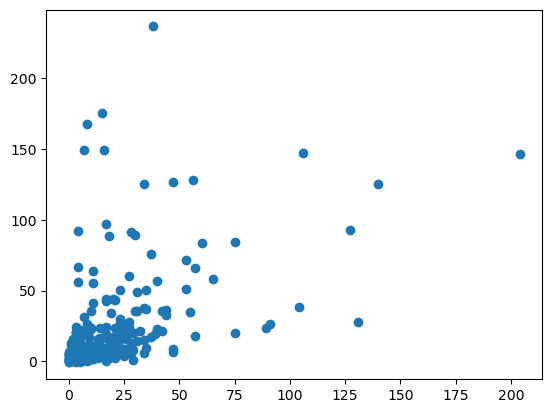

In [115]:
myNN = Pipeline([('scale', StandardScaler()), ('mlp',MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,50),activation='relu'))])
myNN.fit(X_train,y_train)
y_est = myNN.predict(X_test)
plt.scatter(y_test,y_est)